# 1. Introduction Employee Churn
• It is a fact employees leave an organization for various reasons.<br>

• Employees churn is a serious issue for all organizations, but particularly for high-tech
industries, service organizations and banks. <br>

• Losing employee is an important problem for various reasons:
    <ol style="list-style:circle">
        <li>Difficult to find suitable replacement for employees.</li>
        <li>It takes time, effort and money to recruit new employees.</li>
        <li>It takes time and efforts for new employees to achieve the same levels of expertise and productivity.</li>
        <li>Lost of an employee costs money.</li>
    </ol>

# 2. Types of employee churn
• Voluntary <br>

• Involuntary

# 3. Reason for churn
• Voluntary <br>

➢ Positive reason: offer of better things (work, pay, conditions and facilities, career growth, location, leadership,...) <br>

➢ Negative reason: conflict with supervisors or colleagues, lack of things (appreciation, interesting work, training, ...) <br>

• Involuntary <br>

➢ Lay off <br>

=> Focus on voluntary employees churn

## Import data

In [ ]:
# Enter your code here
import pandas as pd

In [ ]:
df = pd.read_excel('./HR_comma_sep.xlsx')

In [ ]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2.0,157.0,3.0,0.0,1.0,0.0,sales,low
1,0.80,0.86,5.0,262.0,6.0,0.0,1.0,0.0,sales,medium
2,0.11,0.88,7.0,272.0,4.0,0.0,1.0,0.0,sales,medium
3,0.72,0.87,5.0,223.0,5.0,0.0,1.0,0.0,sales,low
4,0.37,0.52,2.0,159.0,3.0,0.0,1.0,0.0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2.0,151.0,3.0,0.0,1.0,0.0,support,low
14995,0.37,0.48,2.0,160.0,3.0,0.0,1.0,0.0,support,low
14996,0.37,0.53,2.0,143.0,3.0,0.0,1.0,0.0,support,low
14997,0.11,0.96,6.0,280.0,4.0,0.0,1.0,0.0,support,low


## Inspect Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  float64
 3   average_montly_hours   14999 non-null  float64
 4   time_spend_company     14999 non-null  float64
 5   Work_accident          14999 non-null  float64
 6   left                   14996 non-null  float64
 7   promotion_last_5years  14999 non-null  float64
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14996.000000,14999.000000
mean,0.612834,0.716102,3.809587,201.050337,3.498233,0.144610,0.238130,0.021268
std,0.248631,0.171169,1.461516,49.943099,1.460136,0.351719,0.425953,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,100.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
pip install ydata-profiling

In [ ]:
import ydata_profiling

report = df.profile_report()
report.to_file('report.html')

In [ ]:
report

## Preprocessing Data

### Statistics & NAN Handling

In [ ]:
df.duplicated().sum()

3007

In [ ]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     3
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [ ]:
df.dropna(inplace=True)

### Statistics & Outlier Handling

In [ ]:
df = df[df.number_project < 50]

In [ ]:
df['department'].value_counts()

sales          4140
technical      2717
support        2228
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [ ]:
df['department'] = df['department'].replace('human resource', 'hr')

/var/folders/_1/0rdbwcr553l3y19vn88k14y80000gn/T/ipykernel_3589/312686781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['department'] = df['department'].replace('human resource', 'hr')


In [ ]:
list_colums = list(df.columns)
dep_var = 'left'
list_colums.remove(dep_var)

In [ ]:
threshold = 20

In [ ]:
nuniqe_stats = df.nunique()

In [ ]:
num_var = list(nuniqe_stats[nuniqe_stats > threshold].index)

In [ ]:
num_var

['satisfaction_level', 'last_evaluation', 'average_montly_hours']

In [ ]:
cat_var = list(nuniqe_stats[nuniqe_stats < threshold].index)

In [ ]:
cat_var

['number_project',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'department',
 'salary']

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9,3)
plt.style.use("ggplot")

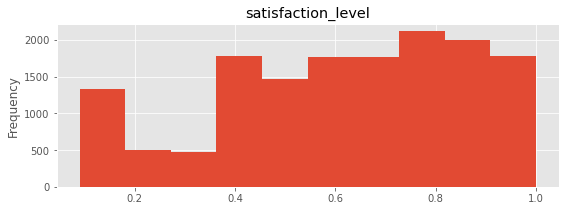

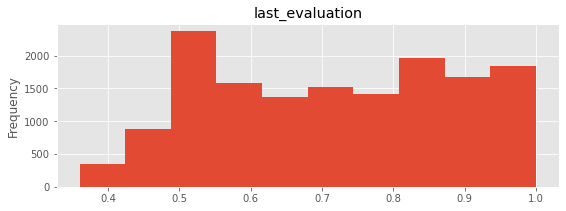

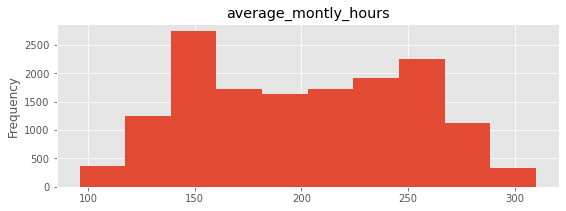

In [ ]:
for col in num_var:
    df[col].plot(kind = 'hist')
    plt.title(col)
    plt.show()

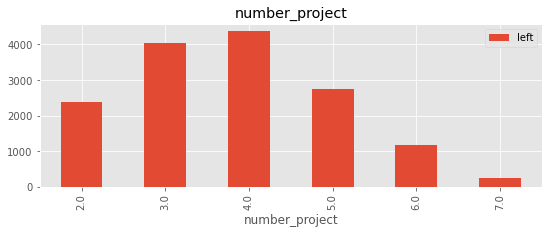

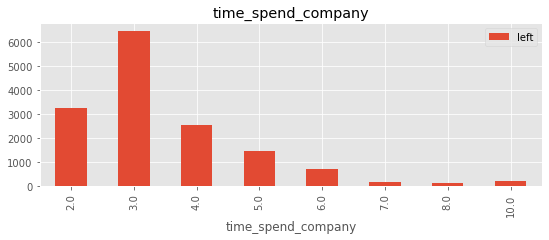

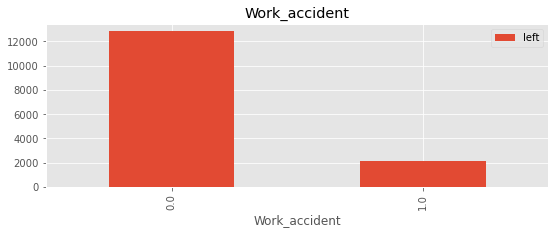

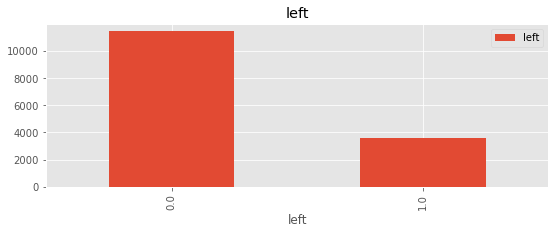

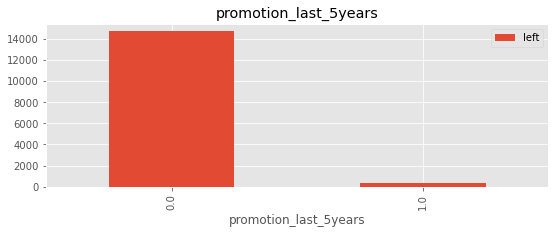

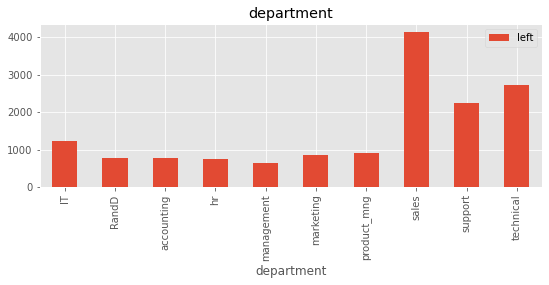

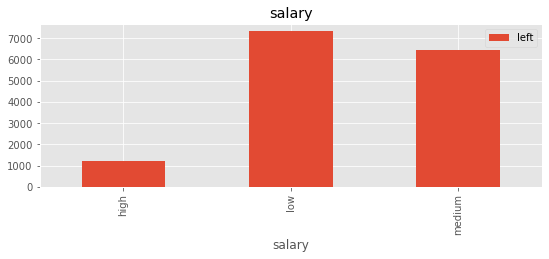

In [ ]:
for col in cat_var:
    df.groupby(col).agg({'left':'count'}).plot(kind = 'bar')
    plt.title(col)
    plt.show()

<AxesSubplot:ylabel='department'>

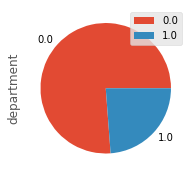

In [ ]:
df.groupby('left').agg({'department':'count'}).plot(kind = 'pie', y = 'department')

In [ ]:
df.groupby('left').agg({'department':'count'})/len(df)

,department
left,
0.0,0.761921
1.0,0.238079


## Simple Data Analytics




### Single Factor Analysis



In [ ]:
cat_var

['number_project',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'department',
 'salary']

<AxesSubplot:xlabel='number_project'>

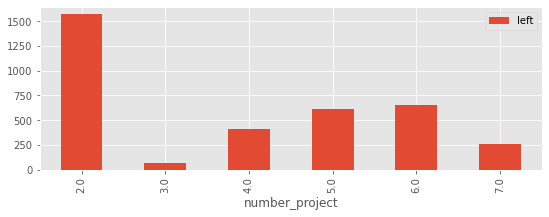

In [ ]:
df.groupby('number_project').agg({'left': 'sum'}).plot(kind = 'bar')

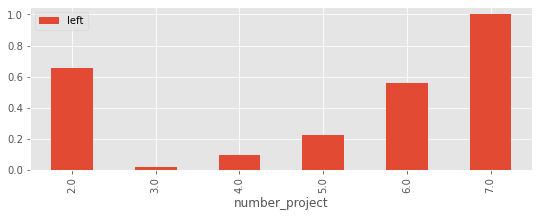

In [ ]:
df.groupby('number_project').agg({'left': 'mean'}).plot(kind = 'bar')
plt.show()

In [ ]:
df['number_project'].dtype == 'float64'


True

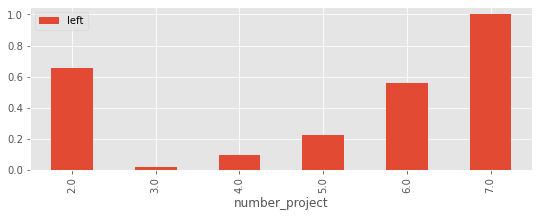

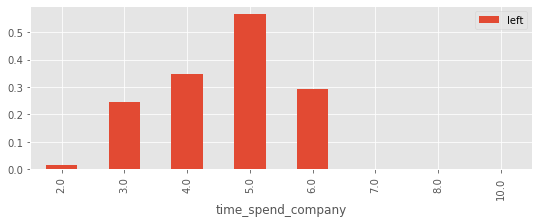

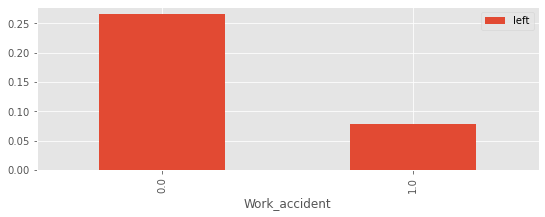

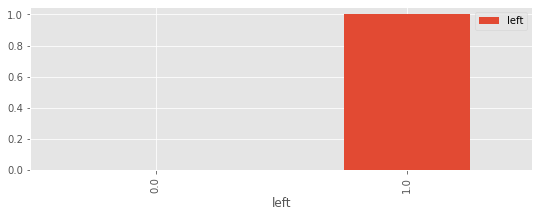

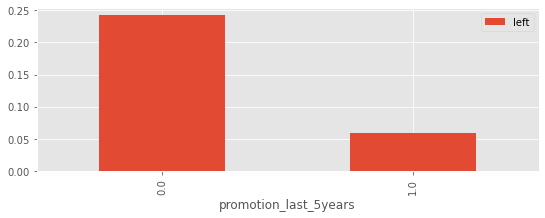

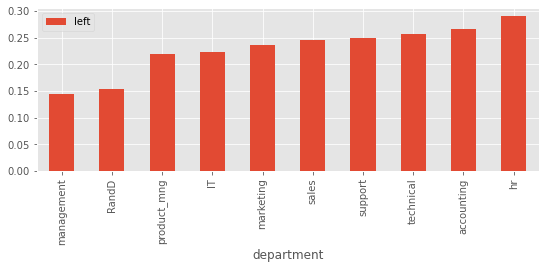

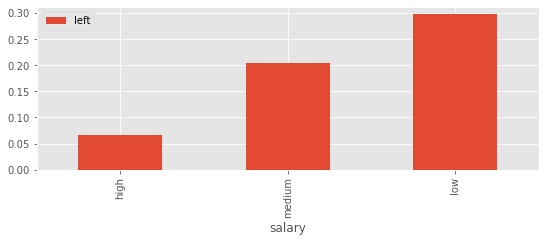

In [ ]:
for col in cat_var:
    if df[col].dtype == 'float64':
        df.groupby(col).agg({'left': 'mean'}).plot(kind = 'bar')
    else:
        df.groupby(col).agg({'left': 'mean'}).sort_values('left').plot(kind = 'bar')
    plt.show()

<AxesSubplot:>

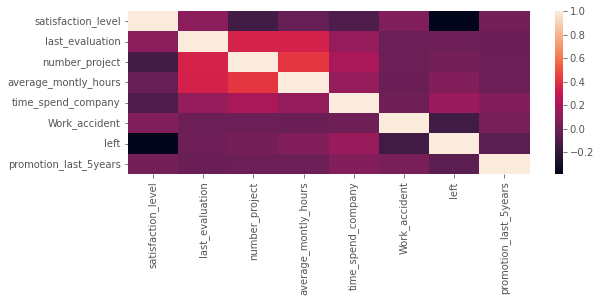

In [ ]:
import seaborn as sns
sns.heatmap(df.corr())

In [ ]:
num_var

['satisfaction_level', 'last_evaluation', 'average_montly_hours']

/Users/nhatson/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nhatson/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


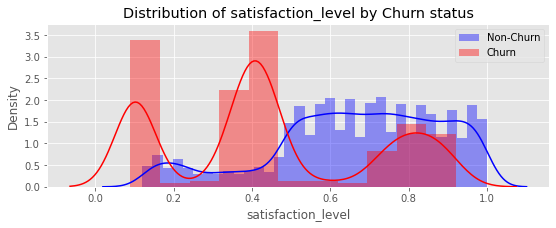

/Users/nhatson/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nhatson/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


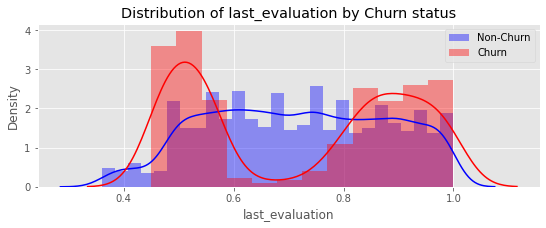

/Users/nhatson/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nhatson/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


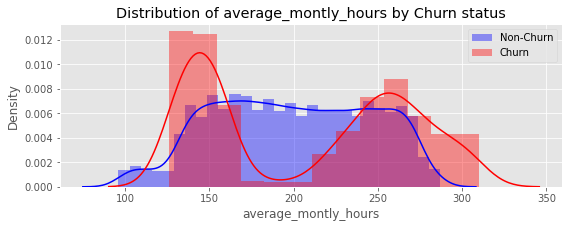

In [ ]:
# Enter your code here
import seaborn as sns

for col in num_var:
    sns.distplot(df[df.left == 0][col], label = 'Non-Churn', color='blue')
    sns.distplot(df[df.left == 1][col], label = 'Churn',color='red')
    plt.title(f'Distribution of {col} by Churn status')
    plt.legend()
    plt.show()


###  Multiple-Factor Analysis (2 factors)

In [ ]:
cat_var.remove('left')

/Users/nhatson/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


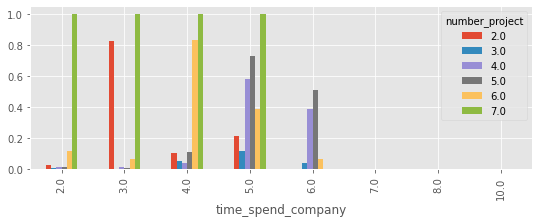

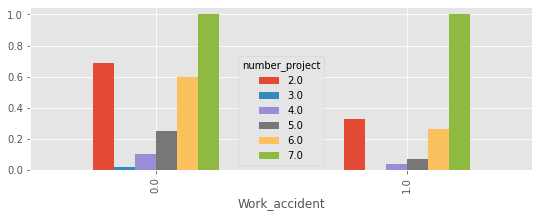

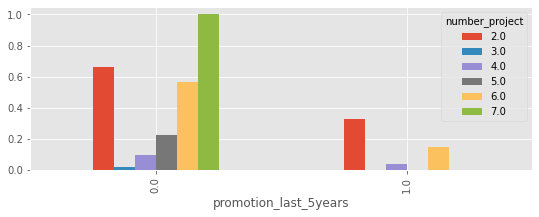

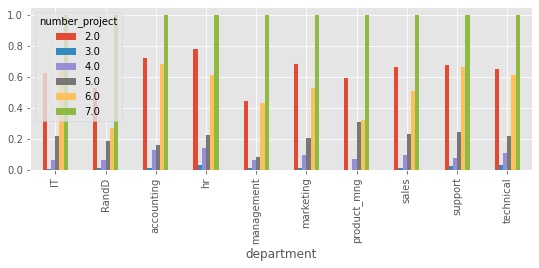

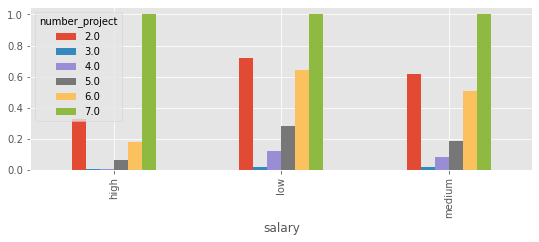

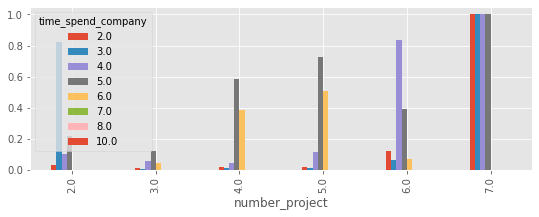

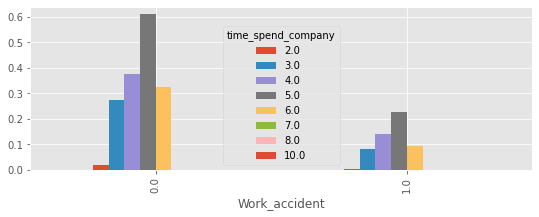

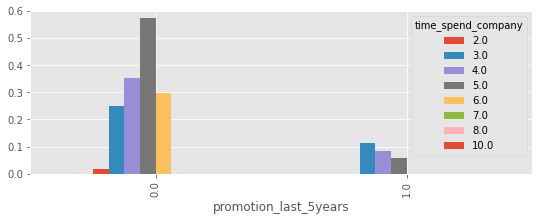

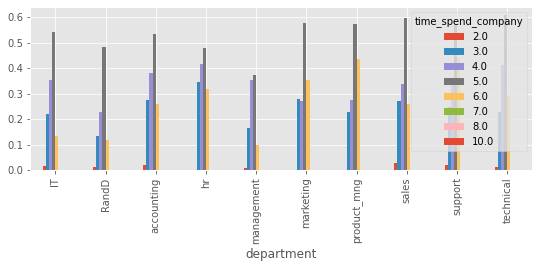

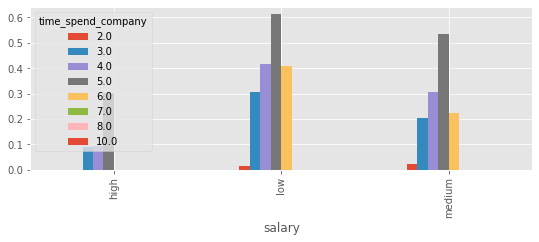

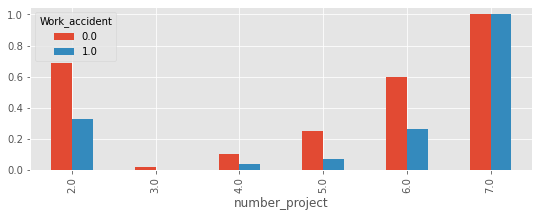

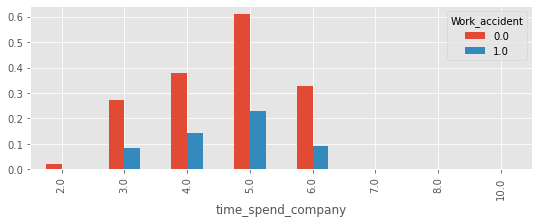

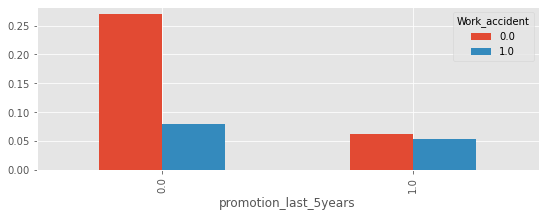

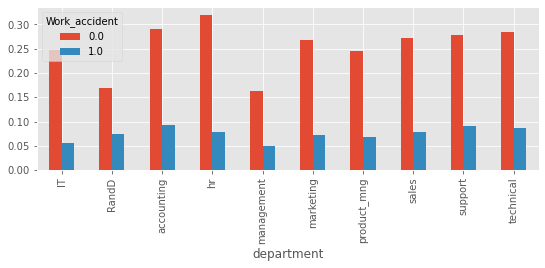

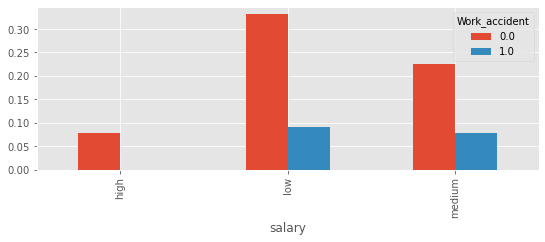

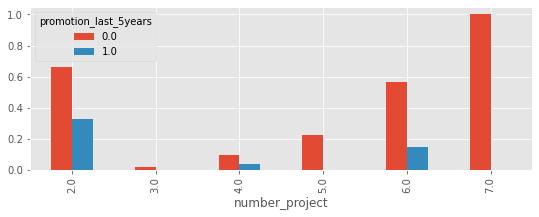

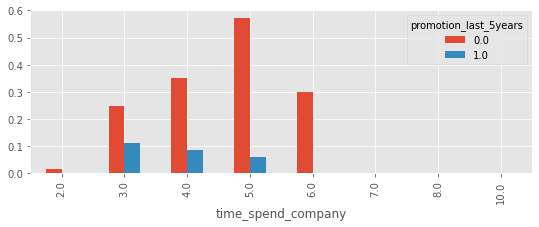

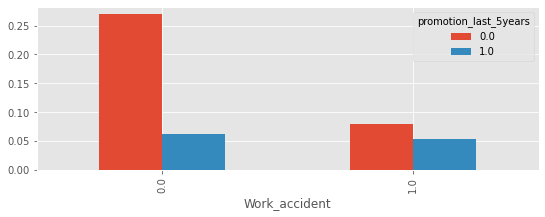

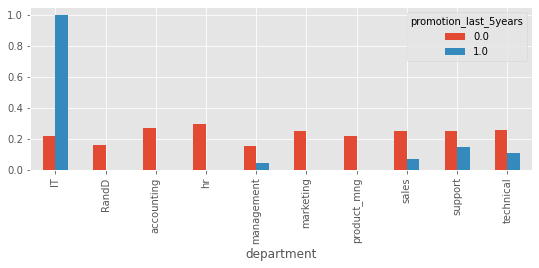

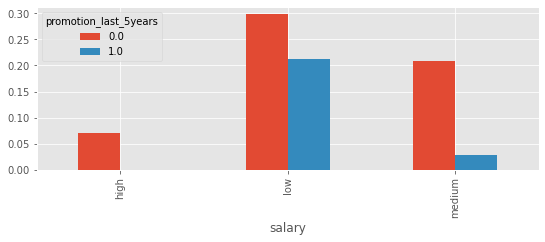

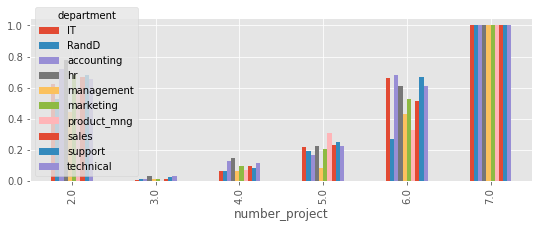

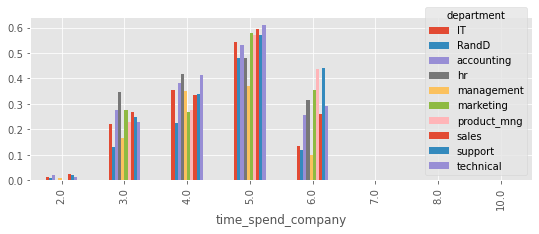

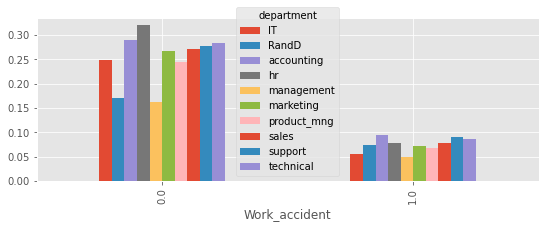

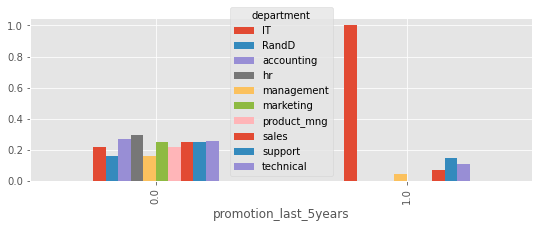

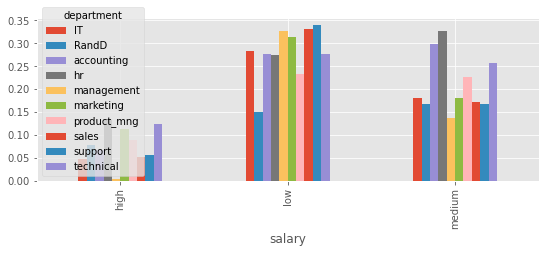

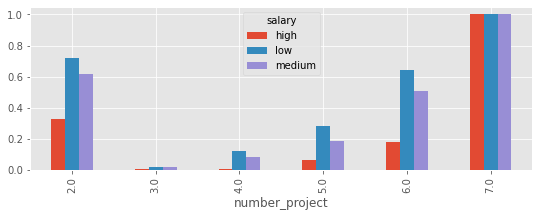

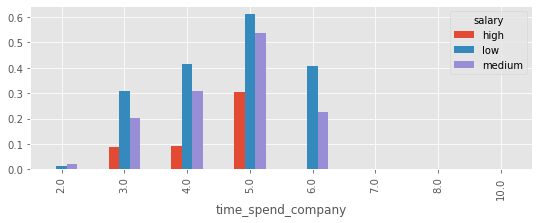

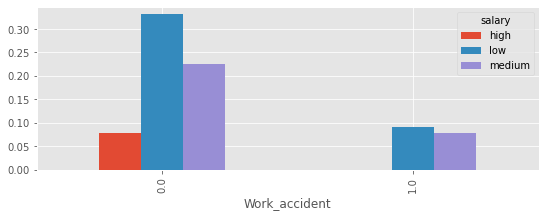

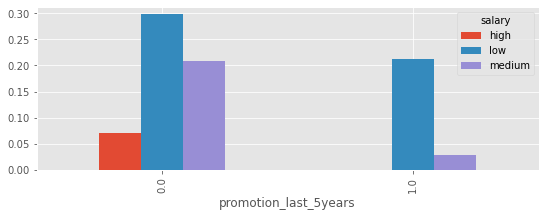

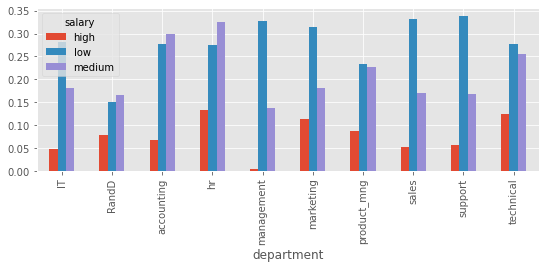

In [ ]:
for col1 in cat_var:
    for col2 in cat_var:
        if col1 != col2:
            df.pivot_table(columns=col1, index=col2,\
                           values='left', aggfunc='mean').plot(kind ='bar')

In [ ]:
new_df = df.pivot_table(columns='promotion_last_5years', index='department', values='left', aggfunc='mean')

<AxesSubplot:xlabel='department'>

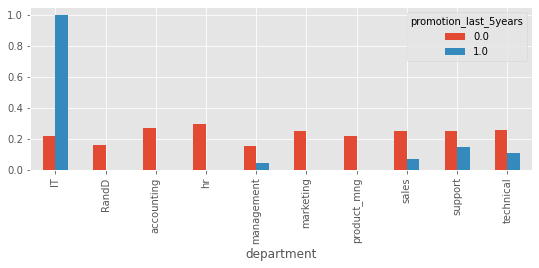

In [ ]:
new_df.plot(kind = 'bar')